<a href="https://colab.research.google.com/github/WizardResearcher442/Pytorch-Journey/blob/main/torch_journey_dataset_et_dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#code for processing data samples can get messy and hard to maintain; we ideally want ou dataset code
#to be decoupled from our model trianing as much as possible
#Pytorch provides two data priomitives: torch.utils.data.DataLoader and torch.utils.Dataset
#that allow you to use preloaded and your own dataset.
#Dataset stores the samples and their correponding labels, and
# DataLoader wraps an iterable around the dataset to enable access to the samples.

#Pytorch domain libraries provides a number nof preloaded datasets such as Fashion-MNIST
#that succlass torch.utils.Dataset and implement functions specific to the particular data.
#Thesy can be used to protype and benchmark your model.
#You can find them here : Image Dataset


In [ ]:
#Loading Dataset
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
  root="data",
  train= False,
  download=True,
  transform=ToTensor()
)

test_data= datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

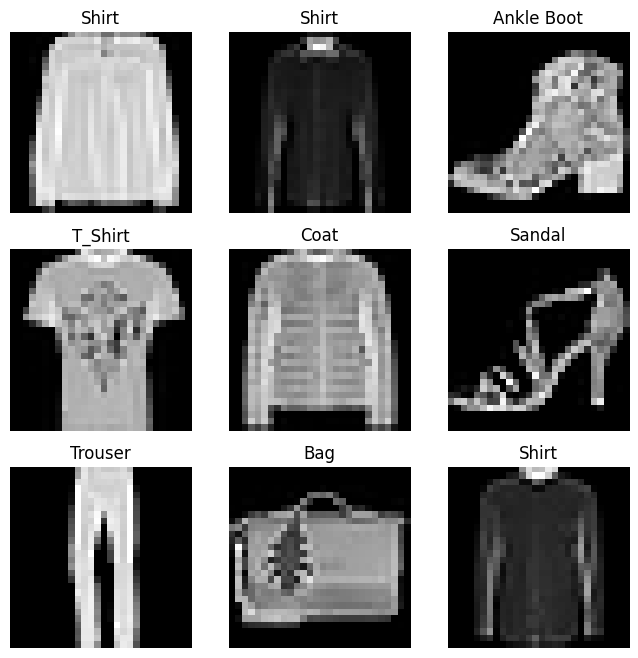

In [ ]:
#Iterating and visualising the Dataset
#we can index the Dataset manually like a list: training_data[index].
#We use matplotl;ib to visualize some samples in our taining data.

labels_map = {
    0: "T_Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot" # Added the missing label for index 9
}

figure = plt.figure(figsize=(8,8))
cols ,rows = 3,3
for i in range(1, cols * rows + 1 ):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
#Creating a custom Dataset for your files
#A custom Dataset class must implement three functions:__init__, len, and __getitem__
#and their l;abels aree stored seperately in a csv file annotations file
#in the next section we will breakdown what is happening in each and every one of this function
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = decode_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label

In [ ]:
#Preparing your data for training with DataLoaders
#The dataset retrieves our datasets's features  and labels one sample at a time .
#While training a model, we typically want to pss samples in "minibatches", reshuffle the data at evry epoch to reduce the
#model overfitting, and use Python's multip[rocessing to speed data retrieval.
#DataLoader is an iterable that abstracts this complexity mfor us in an easy API.

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
#Iterate through the DataLoader
#we have loaded that dataset into the Datalolader and can iterate theough the dataset as needed. each iteraTIOPN
#below returns a batch of train_features and train_label(containing batch_size=64) features ands labels respectively. because
#we specified shuffle=True, after we iterate over all batches the data is shuffled
#(for finer=grained control the data loading order, ta)